# HR Attrition Exploratory Data Analysis
Project Goal:Uncover Patterns behind employee turnover

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

# Data Source
The dataset used for this analysis is the "HR Attrition Analysis Mock Data" available on Kaggle:

[https://www.kaggle.com/datasets/abhiii97/hr-attrition-analysis-mock-data](https://www.kaggle.com/datasets/abhiii97/hr-attrition-analysis-mock-data)

# Loading Dataset
Data Cleaning & Preprocessing

In [10]:
df = pd.read_csv("HR-Attrition_analysis.csv")

In [12]:
df = df[df.columns[0]].str.split(';', expand=True)

In [14]:
df.columns = [
    'EmployeeID', 'Attrition', 'Age', 'Gender', 'JobRole', 'Department',
    'Business Travel', 'Marital Status', 'Total Working Years', 'Monthly Income',
    'Years Since Last Promotion', 'Job Satisfaction', 'Environment Satisfaction'
] 

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmployeeID                  1470 non-null   object
 1   Attrition                   1470 non-null   object
 2   Age                         1470 non-null   object
 3   Gender                      1470 non-null   object
 4   JobRole                     1470 non-null   object
 5   Department                  1470 non-null   object
 6   Business Travel             1470 non-null   object
 7   Marital Status              1470 non-null   object
 8   Total Working Years         1470 non-null   object
 9   Monthly Income              1470 non-null   object
 10  Years Since Last Promotion  1470 non-null   object
 11  Job Satisfaction            1470 non-null   object
 12  Environment Satisfaction    1470 non-null   object
dtypes: object(13)
memory usage: 149.4+ KB


In [19]:
df.describe() 

,EmployeeID,Attrition,Age,Gender,JobRole,Department,Business Travel,Marital Status,Total Working Years,Monthly Income,Years Since Last Promotion,Job Satisfaction,Environment Satisfaction
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,1470,2,43,2,9,3,3,3,40,1349,16,4,4
top,RM412,No,35,Male,Sales Executive,Research & Development,Rarely Travel,Married,10,2342,0,4,3
freq,1,1233,78,882,326,961,1043,726,202,4,581,459,453


In [21]:
df

,EmployeeID,Attrition,Age,Gender,JobRole,Department,Business Travel,Marital Status,Total Working Years,Monthly Income,Years Since Last Promotion,Job Satisfaction,Environment Satisfaction
0,RM412,No,60,Female,Manager,Research & Development,Rarely Travel,Married,33,19566,11,1,1
1,RM428,No,60,Female,Sales Executive,Sales,Travel Frequently,Married,22,10266,13,1,3
2,RM537,No,60,Male,Sales Executive,Sales,Rarely Travel,Single,10,5405,2,1,1
3,RM1210,No,60,Male,Healthcare Representative,Research & Development,Rarely Travel,Married,19,10883,0,4,3
4,RM007,No,59,Female,Research Scientist,Research & Development,Rarely Travel,Married,12,2670,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,RM973,No,18,Female,Laboratory Technician,Research & Development,Non Travel,Single,0,1611,0,4,4
1466,RM302,No,18,Female,Sales Representative,Sales,Rarely Travel,Single,0,1200,0,3,4
1467,RM458,Yes,18,Male,Sales Representative,Sales,Travel Frequently,Single,0,1878,0,2,2
1468,RM1154,Yes,18,Female,Sales Representative,Sales,Travel Frequently,Single,0,1569,0,4,2


In [23]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

EmployeeID                    0
Attrition                     0
Age                           0
Gender                        0
JobRole                       0
Department                    0
Business Travel               0
Marital Status                0
Total Working Years           0
Monthly Income                0
Years Since Last Promotion    0
Job Satisfaction              0
Environment Satisfaction      0
dtype: int64

# Employee Attrition Analysis: 

# Current employee attrition rate

The current employee attrition rate is: 16.12%


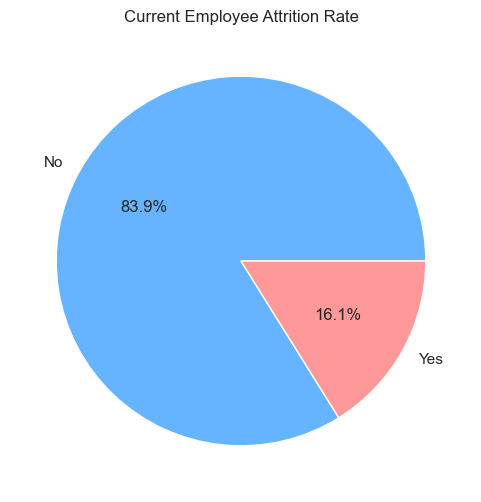

In [38]:
attrition_counts = df['Attrition'].value_counts()
attrition_rate = attrition_counts.get('Yes', 0) / len(df) * 100

print(f"The current employee attrition rate is: {attrition_rate:.2f}%")

plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Current Employee Attrition Rate')
plt.show() 

# Marital Status Breakdown

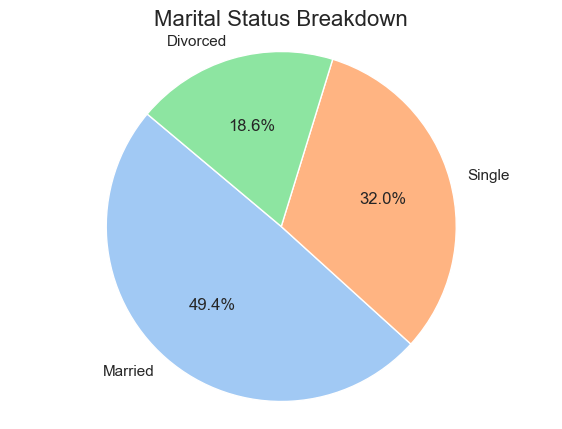

In [107]:
plt.figure(figsize=(7,5))
marital_status_counts = df['Marital Status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Marital Status Breakdown', fontsize=16)
plt.axis('equal') 
plt.show()
 

# Attrition Count by Department

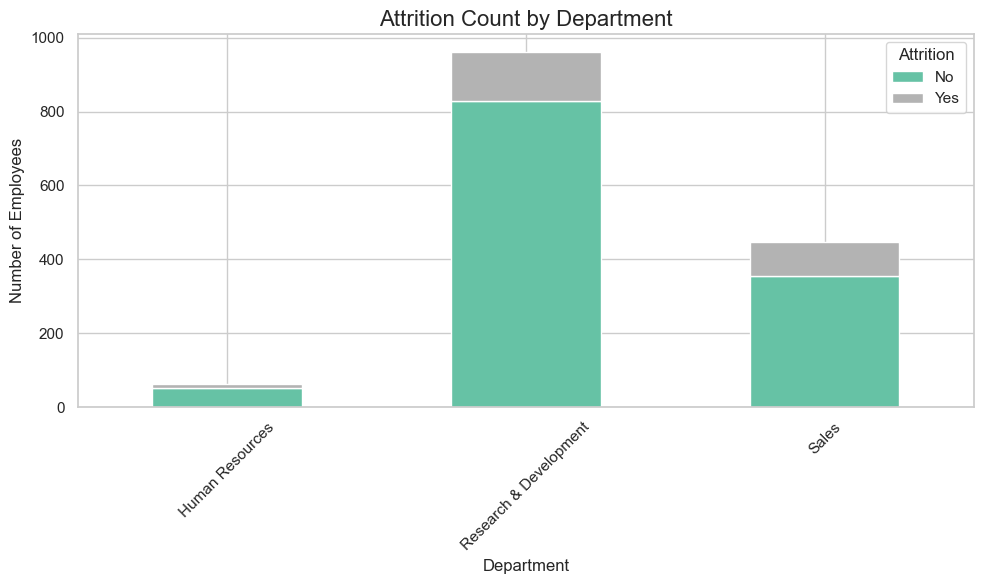

In [93]:
attrition_by_dept = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
attrition_by_dept.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Attrition Count by Department', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show() 

# Attrition Rate by Gender

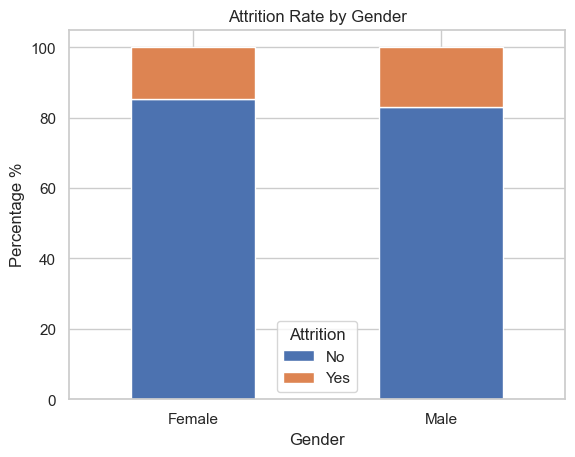

In [95]:
gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
gender_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Gender')
plt.ylabel('Percentage %')
plt.xlabel('Gender')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.show() 

# Departments or job roles most affected by attrition

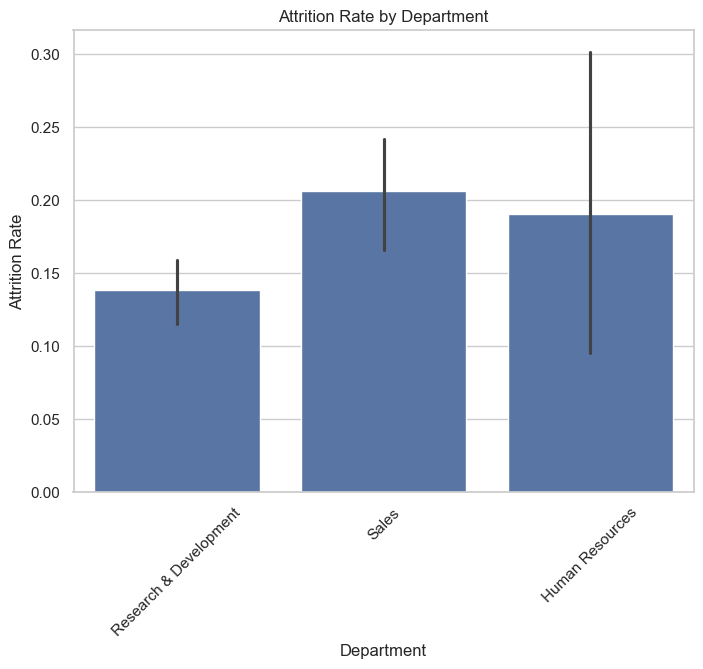

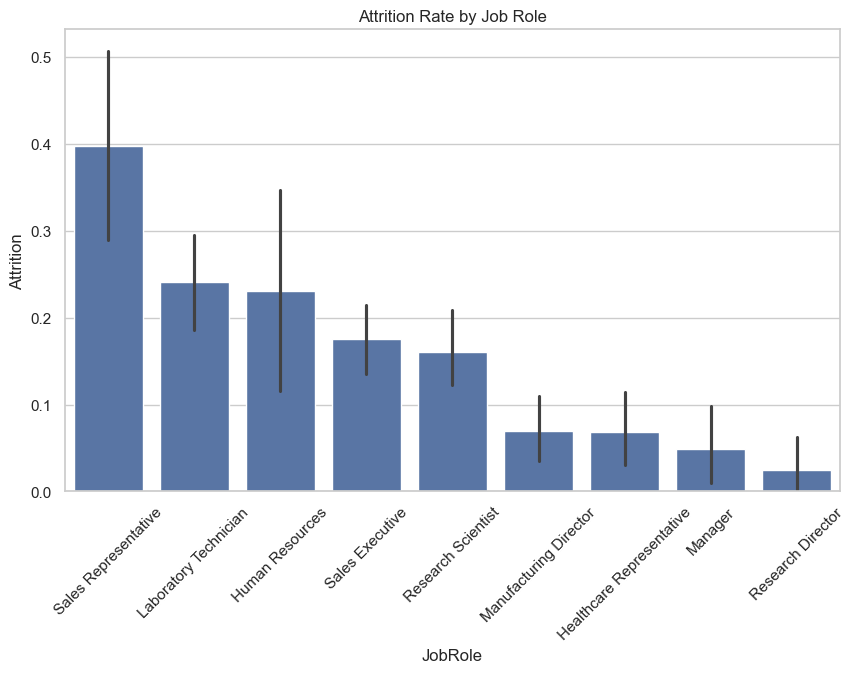

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='Department', y=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), data=df, estimator='mean')
plt.title("Attrition Rate by Department")
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    x='JobRole',
    y=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0),
    data=df,
    estimator='mean',
    order=df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False).index
)
plt.title("Attrition Rate by Job Role")
plt.xticks(rotation=45)
plt.show()


# Are employees who leave generally less satisfied?

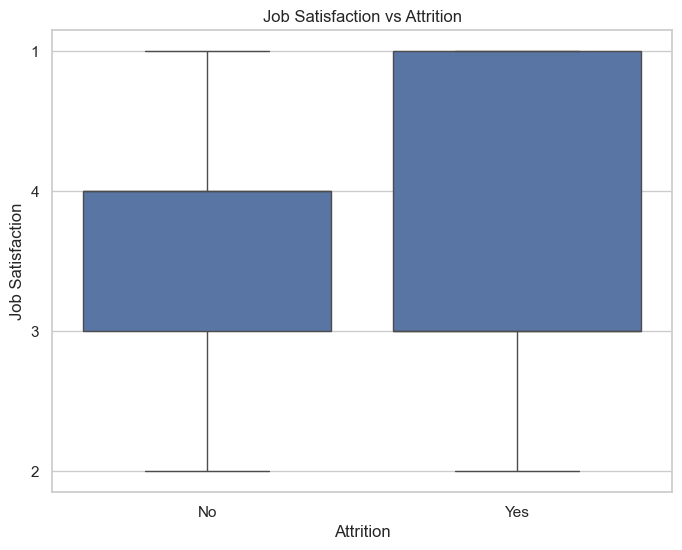

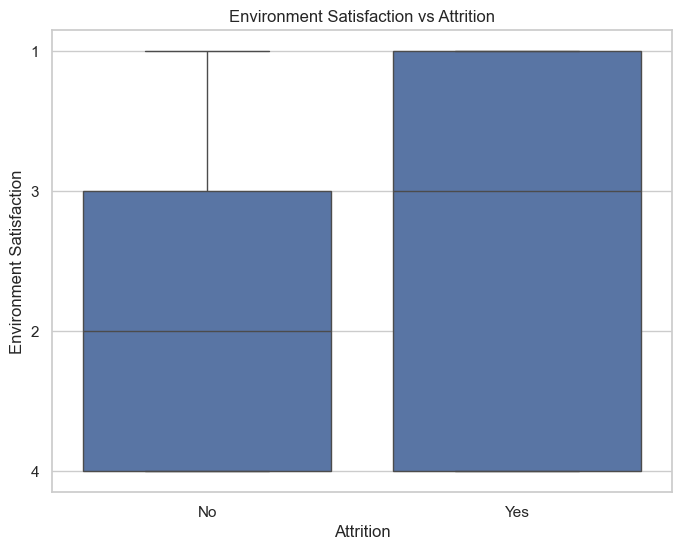

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='Job Satisfaction', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='Environment Satisfaction', data=df)
plt.title("Environment Satisfaction vs Attrition")
plt.show() 

# How does job satisfaction vary across roles or departments?

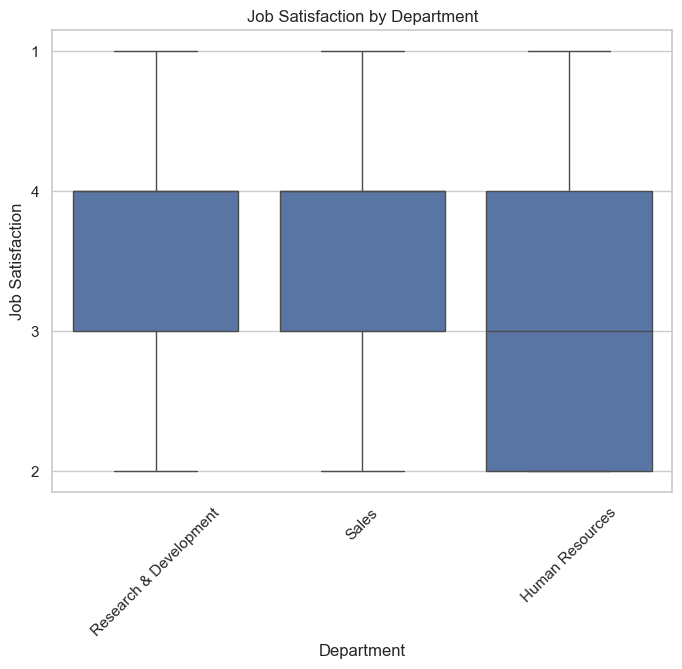

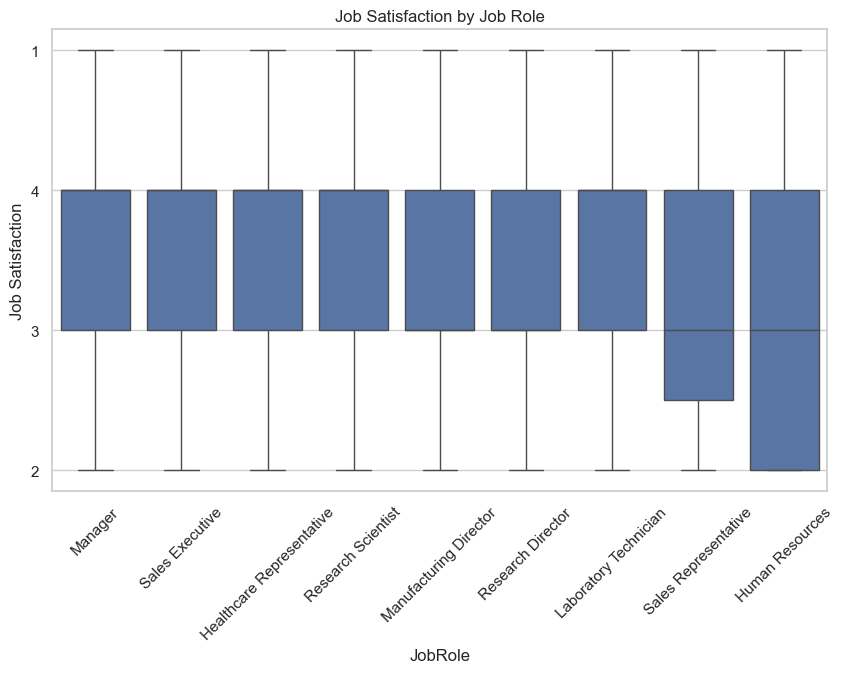

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Department', y='Job Satisfaction', data=df)
plt.title("Job Satisfaction by Department")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='JobRole', y='Job Satisfaction', data=df)
plt.title("Job Satisfaction by Job Role")
plt.xticks(rotation=45)
plt.show() 

# Is attrition higher among younger employees?

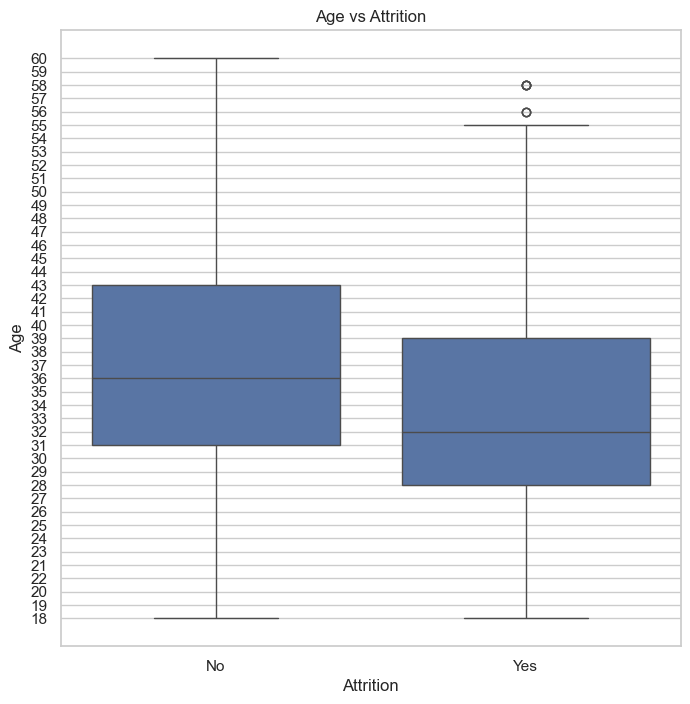

In [74]:
plt.figure(figsize=(8, 8)) 
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show() 